In [10]:
#Step 1: Setup and Connect to Database
# Import necessary libraries
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import pandas as pd
import matplotlib.pyplot as plt

# Create engine to connect to the SQLite database
engine = create_engine(r"sqlite:///C:\Users\Tasnia Wahid\Desktop\sqlalchemy\Starter_Code\Resources\hawaii.sqlite", echo=False)

# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)


In [11]:
#Step 2: Explore Database Tables
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [12]:
#Step 3: Save References to Each Table
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [13]:
#Step 4: Create Session Link to the Database
# Create our session (link) from Python to the DB
session = Session(engine)


In [14]:
#Precipitation Analysis

#Find the Most Recent Date in the Dataset
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date


'2017-08-23'

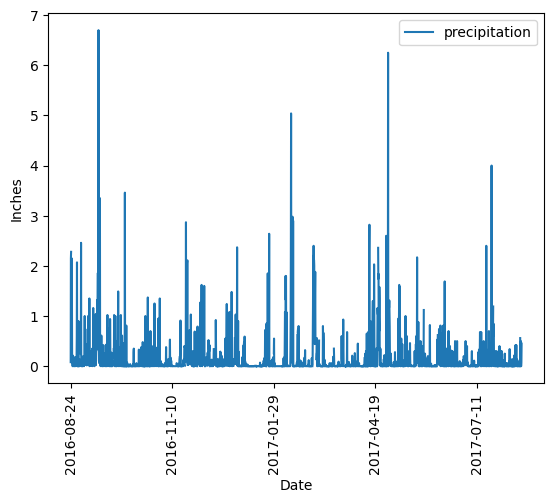

In [15]:
#Retrieve the Last 12 Months of Precipitation Data
import datetime as dt

# Calculate the date one year from the last date in data set.
query_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()


In [16]:
#Print Summary Statistics for the Precipitation Data
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
#Station Analysis
#Calculate the Total Number of Stations
# Design a query to calculate the total number of stations.
session.query(func.count(Station.station)).scalar()


9

In [18]:
#Find the Most Active Stations
# List the stations and observation counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

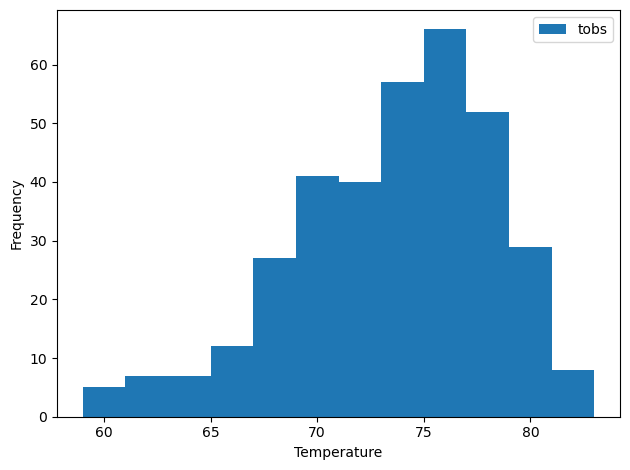

In [19]:
#Temperature Observations for the Most Active Station
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= query_date).all()

# Convert to DataFrame
temp_df = pd.DataFrame(results, columns=['tobs'])

# Plot the results as a histogram
temp_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()


In [20]:
#Step 5: Close Your Session
# Close Session
session.close()
